<a href="https://colab.research.google.com/github/analyst-ujjwal/email_spam_system_ML/blob/main/Email_spam_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1851,ham,Dunno da next show aft 6 is 850. Toa payoh got...,NaN,NaN,NaN
34,spam,Thanks for your subscription to Ringtone UK yo...,NaN,NaN,NaN
4988,ham,So your telling me I coulda been your real Val...,NaN,NaN,NaN
1407,ham,Then we gotta do it after that,NaN,NaN,NaN
2429,spam,Guess who am I?This is the first time I create...,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
917,ham,"When people see my msgs, They think Iam addict..."
5012,ham,"Uncle G, just checking up on you. Do have a re..."
1739,ham,U guys never invite me anywhere :(
766,ham,"I'm nt goin, got somethin on, unless they meet..."
4250,ham,Omg Joanna is freaking me out. She's looked th...


In [9]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [10]:
df.sample(5)

,target,text
3255,ham,Who were those people ? Were you in a tour ? I...
3896,ham,No. Thank you. You've been wonderful
680,ham,What is this 'hex' place you talk of? Explain!
2804,ham,I think it's all still in my car
2034,ham,Is avatar supposed to have subtoitles


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
722,0,That is wondar full flim.
2327,1,URGENT! Your mobile number *************** WON...
3791,0,Love it! I want to flood that pretty pussy wit...
4809,0,"Honey, can you pls find out how much they sell..."
2326,0,The Xmas story is peace.. The Xmas msg is love...


In [14]:
df.isnull().sum()

,0
target,0
text,0


In [15]:
df.duplicated().sum()

np.int64(403)

In [16]:
df = df.drop_duplicates(keep= 'first')

In [17]:
df.shape

(5169, 2)

EDA


In [18]:
df['target'].value_counts()

,count
target,
0,4516
1,653


<function matplotlib.pyplot.show(close=None, block=None)>

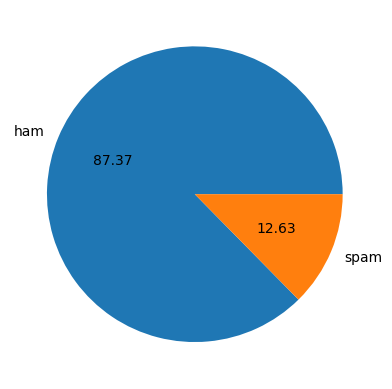

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct='%0.2f')
plt.show

In [20]:
!pip install nltk
import nltk

In [21]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
df['num_char'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_char', 'num_words' , 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
 #ham
 df[df['target'] == 0][['num_char', 'num_words' , 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#spam
df[df['target'] == 1][['num_char', 'num_words' , 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

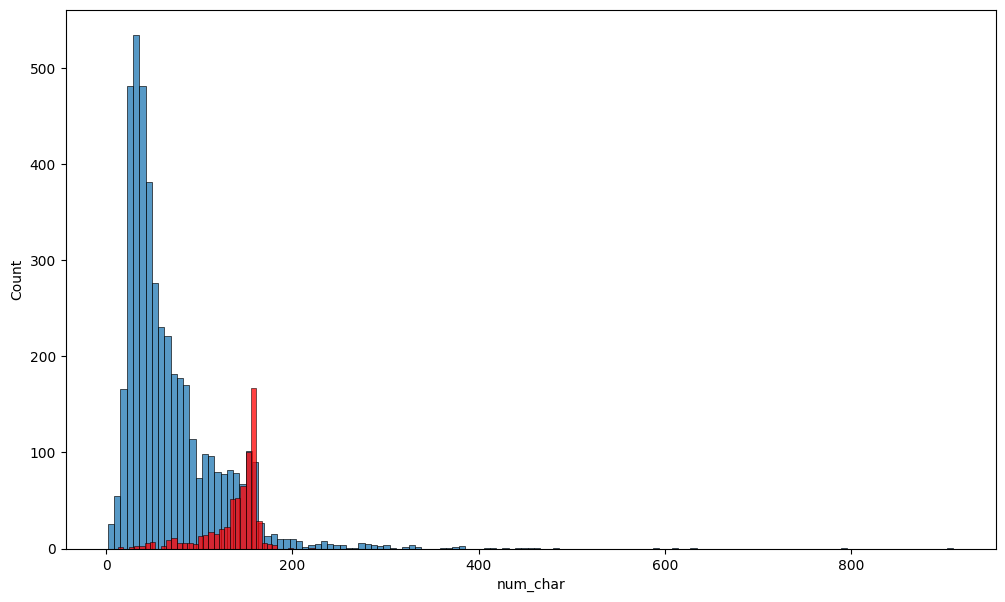

In [32]:
plt.figure(figsize = (12,7))
sns.histplot(df[df['target']== 0]['num_char'])
sns.histplot(df[df['target']== 1]['num_char'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

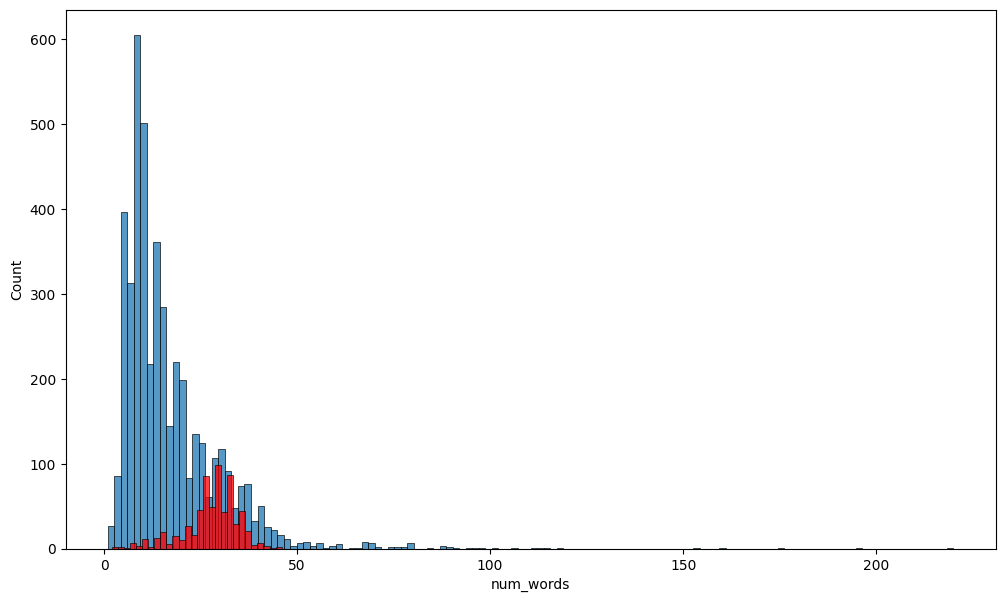

In [33]:
plt.figure(figsize = (12,7))
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'],color = 'red')

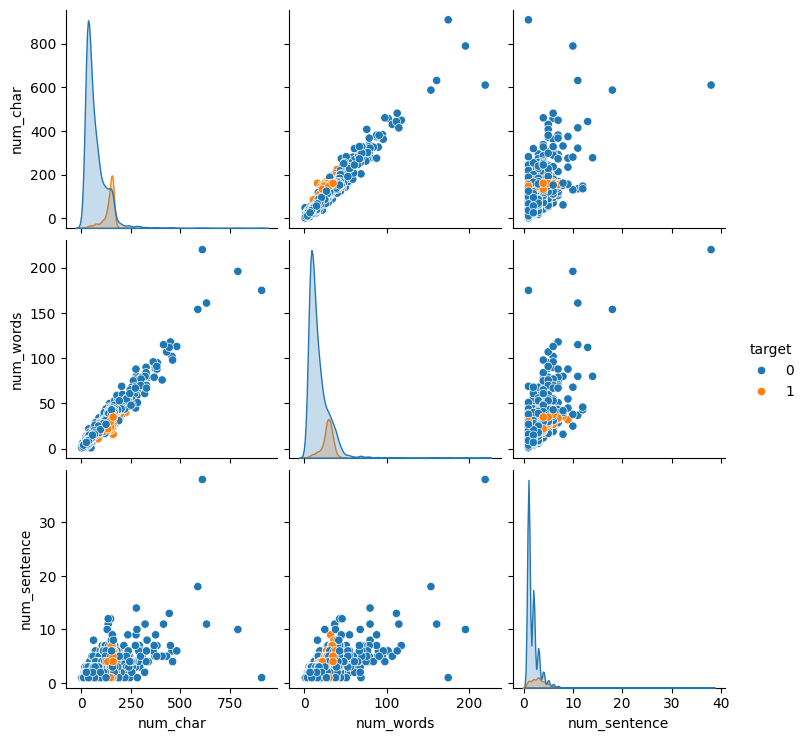

In [34]:
sns.pairplot(df, hue = 'target')

<Axes: >

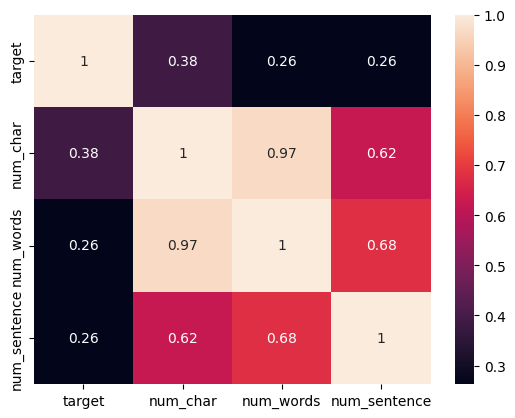

In [35]:
sns.heatmap(df[['target','num_char', 'num_words', 'num_sentence']].corr(), annot = True)

DATA PREPROCESSING

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y = []
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y = []
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [38]:
df['transform'] = df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_char,num_words,num_sentence,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width= 500, height= 500, min_font_size=10, background_color='white')

In [41]:
spam_wc = wc.generate(df[df['target']== 1]['transform'].str.cat(sep = " "))

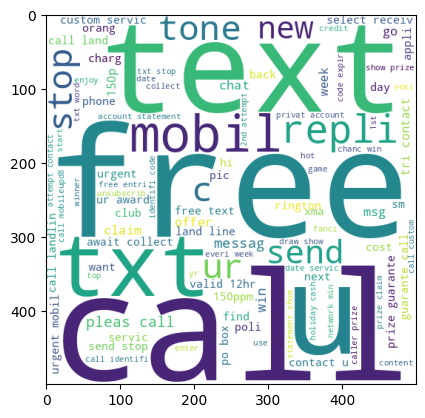

In [42]:
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df['target']== 0]['transform'].str.cat(sep = " "))

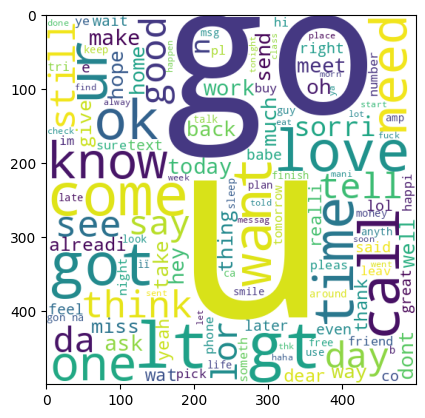

In [44]:
plt.imshow(ham_wc)

In [45]:
spam_corpus = []
for msg in df[df['target']==1]['transform'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

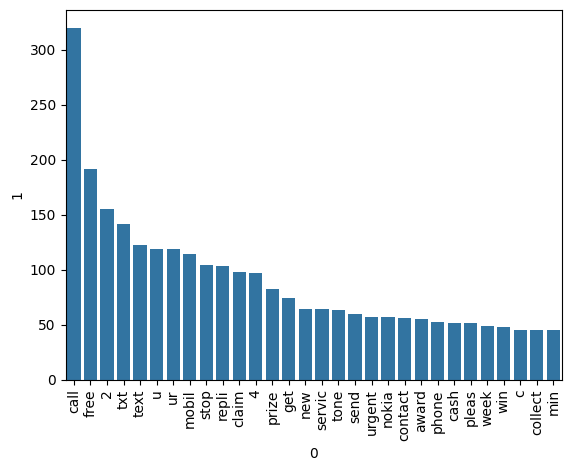

In [47]:
from collections import Counter
common_word = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x = common_word[0],y = common_word[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus = []
for msg in df[df['target']==0]['transform'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [49]:
len(ham_corpus)

35404

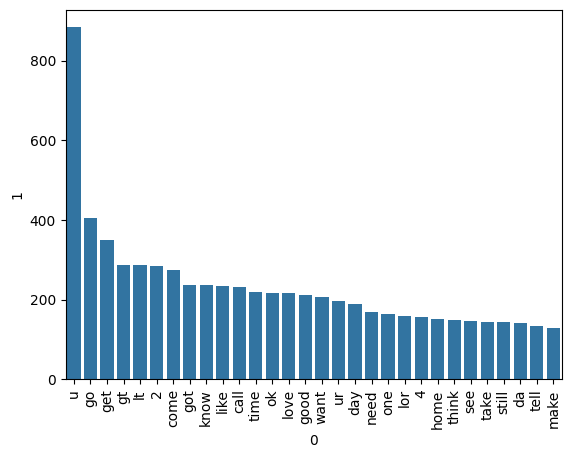

In [50]:
from collections import Counter
common_word = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x = common_word[0],y = common_word[1])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [85]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb,
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb
}

In [86]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [97]:
X = tfidf.fit_transform(df['transform']).toarray()

In [98]:
X.shape

(5169, 3000)

In [99]:
y= df['target'].values

In [100]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.2, random_state= 2)

In [102]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
  print(f'{name} accuracy: {current_accuracy}')
  print(f'{name} precision: {current_precision}')
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

SVC accuracy: 0.9758220502901354
SVC precision: 0.9747899159663865
KN accuracy: 0.9052224371373307
KN precision: 1.0
DT accuracy: 0.9342359767891683
DT precision: 0.85
LR accuracy: 0.9555125725338491
LR precision: 0.96
RF accuracy: 0.9738878143133463
RF precision: 0.9826086956521739
AdaBoost accuracy: 0.9216634429400387
AdaBoost precision: 0.8202247191011236
BgC accuracy: 0.9584139264990329
BgC precision: 0.8682170542635659
ETC accuracy: 0.9748549323017408
ETC precision: 0.9745762711864406
GBDT accuracy: 0.9506769825918762
GBDT precision: 0.9306930693069307
xgb accuracy: 0.9680851063829787
xgb precision: 0.9487179487179487
GNB accuracy: 0.874274661508704
GNB precision: 0.5181818181818182
MNB accuracy: 0.9709864603481625
MNB precision: 1.0
BNB accuracy: 0.9835589941972921
BNB precision: 0.991869918699187


In [103]:
performance_df = pd.DataFrame({'Algorithems': clfs.keys(), 'Accuracy_score': accuracy_scores, 'Precision_score': precision_scores}).sort_values('Precision_score', ascending = False)

In [104]:
performance_df

,Algorithems,Accuracy_score,Precision_score
1,KN,0.905222,1.000000
11,MNB,0.970986,1.000000
12,BNB,0.983559,0.991870
4,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
3,LR,0.955513,0.960000
9,xgb,0.968085,0.948718
8,GBDT,0.950677,0.930693
6,BgC,0.958414,0.868217


In [108]:
import pickle
pickle.dump(tfidf, open('vectorized.pkl','wb'))
pickle.dump(mnb,open('model.pkl', 'wb'))